Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

Importing Data in Python

In [2]:
HB=pd.read_csv('headbrain.csv')
HB.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


Exploring data (EDA)

In [3]:
HB.shape

(237, 4)

In [4]:
HB.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

In [5]:
HB.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [6]:
HB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender         237 non-null int64
AgeRange       237 non-null int64
HeadSize       237 non-null int64
BrainWeight    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


Finding NaN value in dataset

In [7]:
HB.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

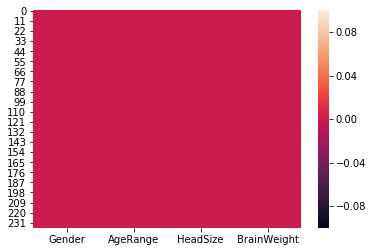

In [8]:
sns.heatmap(HB.isnull())

Finding Relation between two Variable

In [9]:
HB.corr()

,Gender,AgeRange,HeadSize,BrainWeight
Gender,1.000000,-0.088652,-0.514050,-0.465266
AgeRange,-0.088652,1.000000,-0.105428,-0.169438
HeadSize,-0.514050,-0.105428,1.000000,0.799570
BrainWeight,-0.465266,-0.169438,0.799570,1.000000


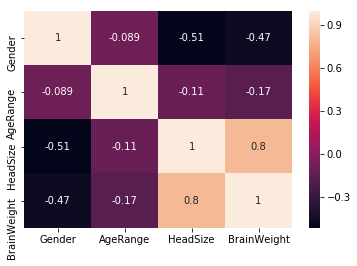

In [10]:
sns.heatmap(HB.corr(),annot=True)

In [11]:
HB['Gender'].unique()

array([1, 2], dtype=int64)

In [12]:
HB['AgeRange'].unique()

array([1, 2], dtype=int64)

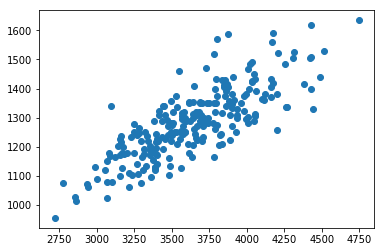

In [13]:
plt.scatter(HB['HeadSize'],HB['BrainWeight'])

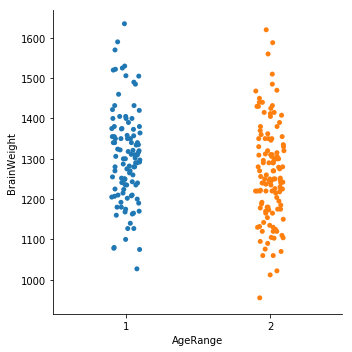

In [14]:
sns.catplot(x="AgeRange",y="BrainWeight",data=HB)

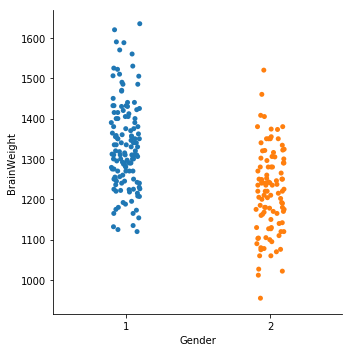

In [15]:
sns.catplot(x="Gender",y="BrainWeight",data=HB)

Detecting Outlier

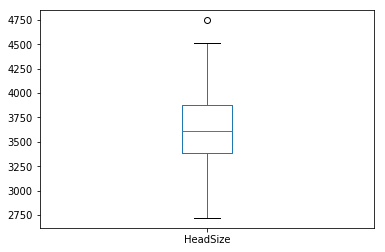

In [16]:
HB['HeadSize'].plot.box()

Type of Variable

sckewness of data

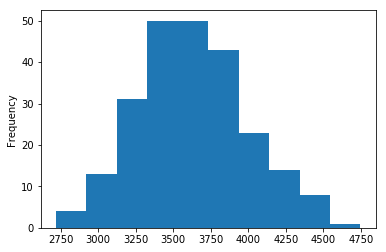

In [17]:
HB['HeadSize'].plot.hist()

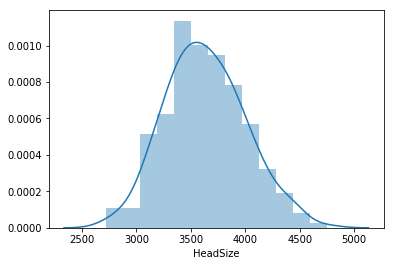

In [18]:
sns.distplot(HB['HeadSize'])

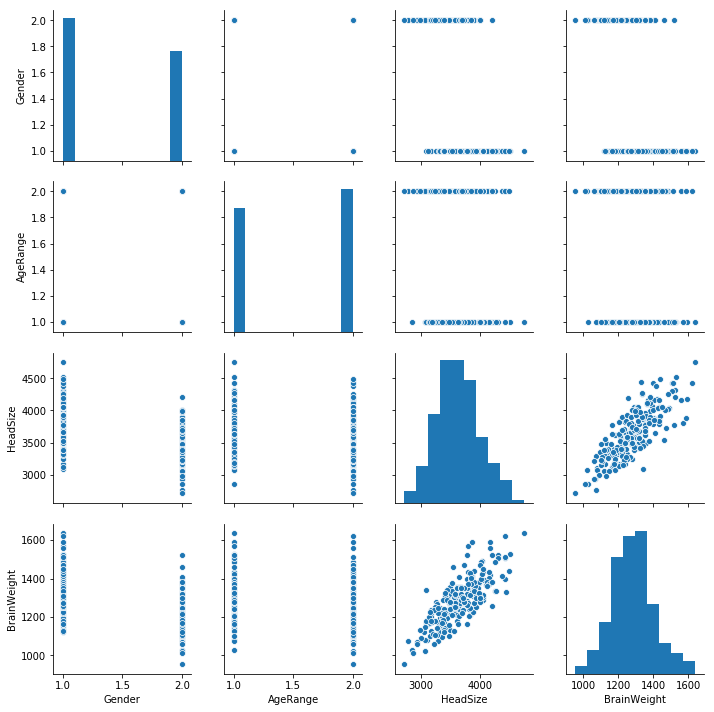

In [19]:
sns.pairplot(HB)

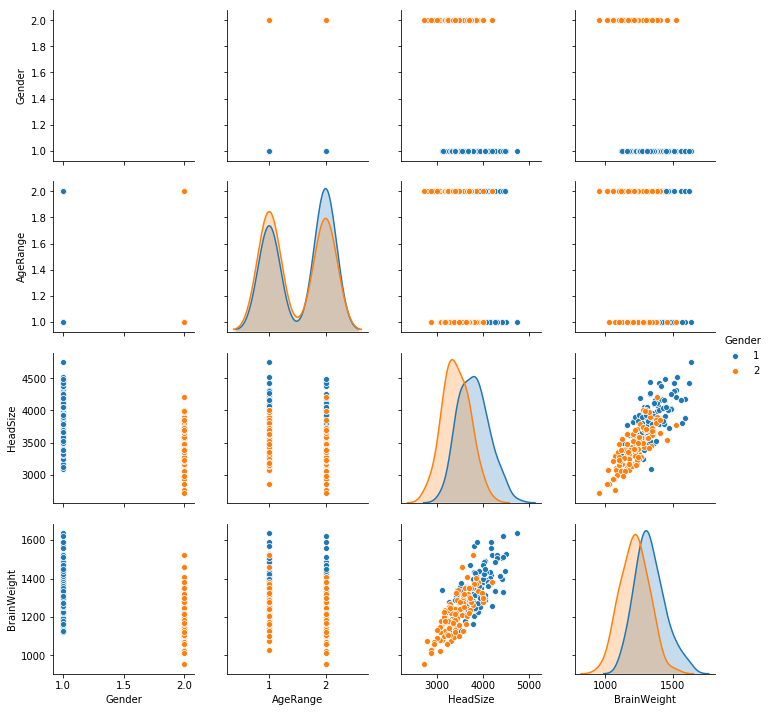

In [20]:
sns.pairplot(HB,hue='Gender')

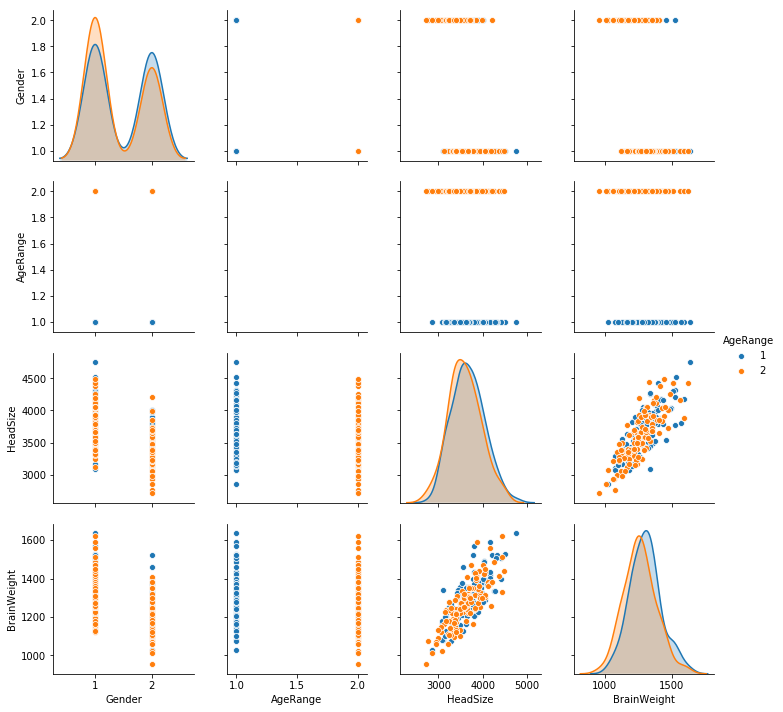

In [21]:
sns.pairplot(HB,hue='AgeRange')

Linear Regression between two variable

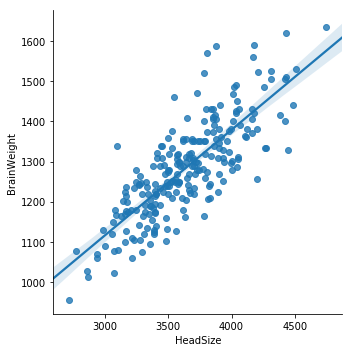

In [22]:
sns.lmplot(x='HeadSize',y='BrainWeight',data=HB)

In [23]:
x=HB.iloc[:,2:-1] 
x.head()

,HeadSize
0,4512
1,3738
2,4261
3,3777
4,4177


scaling of variable in DataFrame x

In [24]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=scale.fit_transform(x)

In [25]:
y=HB.iloc[:,-1]
y.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: BrainWeight, dtype: int64

spliting the data in train and test

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [27]:
x_train.shape


(189, 1)

In [28]:
y_train.shape

(189,)

In [29]:
x_test.shape

(48, 1)

In [30]:
y_test.shape

(48,)

Applying LinearRegression

In [31]:
lr=LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
lr.coef_

array([526.27197789])

In [34]:
lr.intercept_

1046.4813409874648

In [35]:
lr.score(x_train,y_train)

0.5737274443141098

In [36]:
pre=lr.predict(x_test)

In [37]:
print('MAE = ',mean_absolute_error(y_test,pre))

MAE =  43.67246651744193


In [38]:
print('MSE = ',mean_squared_error(y_test,pre))

MSE =  2950.5285153597288


In [39]:
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pre)))

RMSE =  54.3187676163564


In [40]:
print('R2_score = ',r2_score(y_test,pre))

R2_score =  0.832745812102125


Saving the model

In [41]:
from sklearn.externals import joblib 

In [42]:
joblib.dump(lr, 'model_HeadBrain.csv')

['model_HeadBrain.csv']

Load the model and predicting x_test

In [43]:
model = joblib.load('model_HeadBrain.csv') 

In [44]:
model.predict(x_test) 

array([1388.15569861, 1353.62477949, 1444.49561929, 1249.77239116,
       1360.6348157 , 1146.17963379, 1162.01712301, 1270.28323785,
       1305.07378794, 1201.74066155, 1297.54448979, 1136.57328787,
       1222.77077019, 1490.45030112, 1103.3405236 , 1151.37225321,
       1292.0922394 , 1292.87113231, 1340.64323095, 1116.32207214,
       1490.45030112, 1238.08899747, 1344.01843357, 1164.61343272,
       1377.51082881, 1159.68044427, 1477.72838355, 1572.75331888,
       1243.28161688, 1221.47261533, 1488.8925153 , 1201.74066155,
       1330.51762309, 1350.24957687, 1210.56811456, 1171.8830999 ,
       1140.46775243, 1211.0873765 , 1392.05016318, 1290.79408455,
       1160.19970622, 1192.91320854, 1347.13400522, 1266.12914232,
       1271.06213076, 1224.58818698, 1268.985083  , 1046.48134099])